In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
import numpy as np
import seaborn as sns
from lenskit.datasets import ML100K


### Load  preprocess data

In [2]:
# load original data
#orig_data = pd.read_csv('data/mini_ml100k_user_10_item_25.csv', sep=',', encoding='latin-1')
ml100k = ML100K('ml-100k')
orig_data = ml100k.ratings
orig_data = orig_data[['user', 'item', 'rating']]

## 1 epoch

In [ ]:
# load synthetic data
syn_data =  pd.read_csv('output/synthetic_data/syn_complete_110321_1333.csv', sep=',', encoding='latin-1')
syn_data = syn_data[['user', 'item', 'rating']]

### Rating Distribution

C:\Anaconda\envs\recsys\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


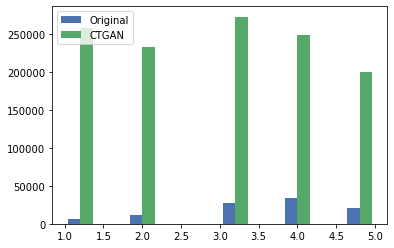

In [118]:
# plot rating distribution
plt.hist([orig_data['rating'], syn_data['rating']], label=['Original', 'CTGAN'])
plt.legend(loc='upper left')

### Item Distribution

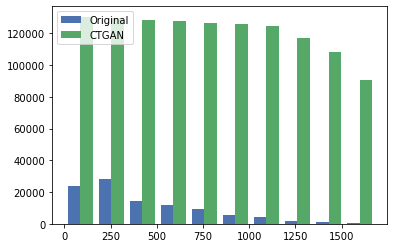

In [119]:
plt.hist([orig_data['item'], syn_data['item']], label=['Original', 'CTGAN'])
plt.legend(loc='upper left')

In [120]:
df_items_orig = orig_data.groupby('item').size().reset_index(name='counts')
df_items_orig = df_items_orig.sort_values(by='counts', ascending=False)
df_items_orig.index.name = None

In [121]:
df_items_syn = syn_data.groupby('item').size().reset_index(name='counts')

In [122]:
# Sort syn data based on the sorting used for the original data,
# to keep the ratings comparable per item.
combined_sorted = pd.merge(df_items_orig, df_items_syn, on="item", how="outer").fillna(0)
combined_sorted['idx'] = range(1, (len(df_items_orig)+1))
#combined_sorted

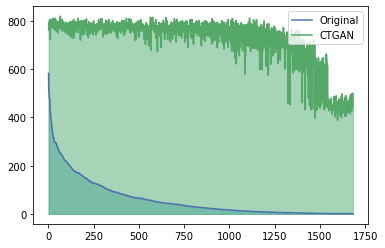

In [123]:
plt.plot(combined_sorted['idx'], combined_sorted['counts_x'], label='Original')
plt.fill_between(combined_sorted['idx'], combined_sorted['counts_x'], color='#539ecd', alpha=0.5)
plt.plot(combined_sorted['idx'], combined_sorted['counts_y'], label='CTGAN')
plt.fill_between(combined_sorted['idx'], combined_sorted['counts_y'], color='#4cad6e', alpha=0.5)
plt.legend(loc='upper right')

### User Distribution

In [124]:
df_users_orig = orig_data.groupby('user').size().reset_index(name='counts')
df_users_orig = df_users_orig.sort_values(by='counts', ascending=False)
df_users_orig.index.name = None

In [125]:
df_users_syn = syn_data.groupby('user').size().reset_index(name='counts')

In [127]:
# Sort syn data based on the sorting used for the original data,
# to keep the ratings comparable per item.
combined_sorted_users = pd.merge(df_users_orig, df_users_syn, on="user", how="outer").fillna(0)
combined_sorted_users['idx'] = range(1, len(df_users_orig)+1)
combined_sorted_users

,user,counts_x,counts_y,idx
0,405,737,1251,1
1,655,685,1293,2
2,13,636,1279,3
3,450,540,1287,4
4,276,518,1248,5
...,...,...,...,...
938,685,20,1259,939
939,475,20,1290,940
940,36,20,1280,941
941,732,20,1292,942


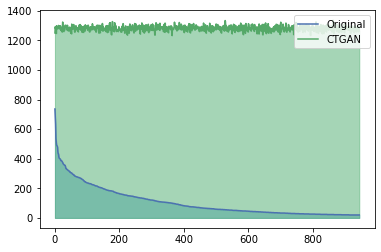

In [128]:
plt.plot(combined_sorted_users['idx'], combined_sorted_users['counts_x'], label='Original')
plt.fill_between(combined_sorted_users['idx'], combined_sorted_users['counts_x'], color='#539ecd', alpha=0.5)
plt.plot(combined_sorted_users['idx'], combined_sorted_users['counts_y'], label='CTGAN')
plt.fill_between(combined_sorted_users['idx'], combined_sorted_users['counts_y'], color='#4cad6e', alpha=0.5)
plt.legend(loc='upper right')


## 100 epochs

In [3]:
# load synthetic data
syn_data =  pd.read_csv('output/synthetic_data/syn_complete_120321_0859_100ep.csv', sep=',', encoding='latin-1')
syn_data = syn_data[['user', 'item', 'rating']]

### Rating distribution

C:\Anaconda\envs\recsys\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


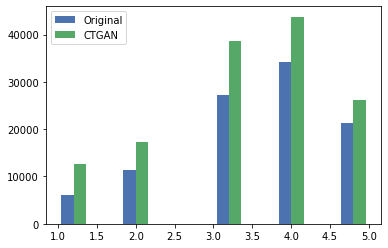

In [4]:
# plot rating distribution
plt.hist([orig_data['rating'], syn_data['rating']], label=['Original', 'CTGAN'])
plt.legend(loc='upper left')

### Item distribution

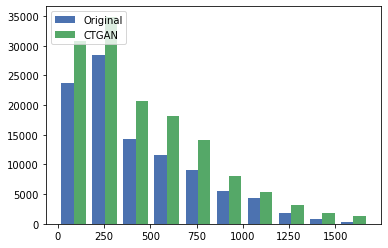

In [5]:
plt.hist([orig_data['item'], syn_data['item']], label=['Original', 'CTGAN'])
plt.legend(loc='upper left')

In [6]:
df_items_orig = orig_data.groupby('item').size().reset_index(name='counts')
df_items_orig = df_items_orig.sort_values(by='counts', ascending=False)
df_items_orig.index.name = None

In [7]:
df_items_syn = syn_data.groupby('item').size().reset_index(name='counts')

In [8]:
# Sort syn data based on the sorting used for the original data,
# to keep the ratings comparable per item.
combined_sorted = pd.merge(df_items_orig, df_items_syn, on="item", how="outer").fillna(0)
combined_sorted['idx'] = range(1, (len(df_items_orig)+1))
#combined_sorted

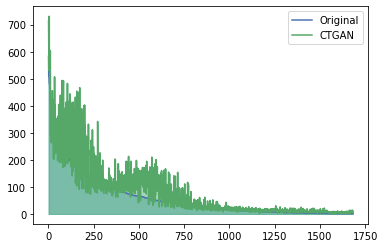

In [9]:
plt.plot(combined_sorted['idx'], combined_sorted['counts_x'], label='Original')
plt.fill_between(combined_sorted['idx'], combined_sorted['counts_x'], color='#539ecd', alpha=0.5)
plt.plot(combined_sorted['idx'], combined_sorted['counts_y'], label='CTGAN')
plt.fill_between(combined_sorted['idx'], combined_sorted['counts_y'], color='#4cad6e', alpha=0.5)
plt.legend(loc='upper right')

### User Distribution

In [10]:
df_users_orig = orig_data.groupby('user').size().reset_index(name='counts')
df_users_orig = df_users_orig.sort_values(by='counts', ascending=False)
df_users_orig.index.name = None

In [11]:
df_users_syn = syn_data.groupby('user').size().reset_index(name='counts')

In [12]:
# Sort syn data based on the sorting used for the original data,
# to keep the ratings comparable per item.
combined_sorted_users = pd.merge(df_users_orig, df_users_syn, on="user", how="outer").fillna(0)
combined_sorted_users['idx'] = range(1, len(df_users_orig)+1)
combined_sorted_users

,user,counts_x,counts_y,idx
0,405,737,163,1
1,655,685,103,2
2,13,636,135,3
3,450,540,135,4
4,276,518,175,5
...,...,...,...,...
938,685,20,156,939
939,475,20,168,940
940,36,20,162,941
941,732,20,152,942


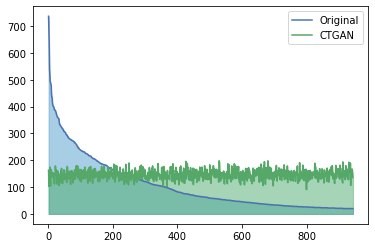

In [13]:
plt.plot(combined_sorted_users['idx'], combined_sorted_users['counts_x'], label='Original')
plt.fill_between(combined_sorted_users['idx'], combined_sorted_users['counts_x'], color='#539ecd', alpha=0.5)
plt.plot(combined_sorted_users['idx'], combined_sorted_users['counts_y'], label='CTGAN')
plt.fill_between(combined_sorted_users['idx'], combined_sorted_users['counts_y'], color='#4cad6e', alpha=0.5)
plt.legend(loc='upper right')